In [1]:
# Final MNIST Model 
# 4 layers(relu), fully connected layer(sotmax)
# batch size = 300
# epochs = 100
# learning rate = 0.00001

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.model_selection import train_test_split

np.random.seed(25)

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


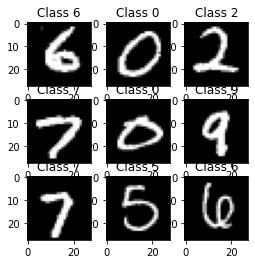

In [2]:
# Downloading MNIST data
# x_train: trainning # y_train: training labels # x_test: testing data # y_test: testing labels
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Split validation data
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state=25)

plt.figure(figsize=(4,4))
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title("Class %s" %y_train[i])



In [3]:
# add channel
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)
x_val = np.expand_dims(x_val, axis=3)
print(x_train.shape)
print(x_test.shape)

# Data normalization
x_train_normalized = x_train / 255
x_test_normalized = x_test / 255
x_val_normalized = x_val / 255

def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.show()

(48000, 28, 28, 1)
(10000, 28, 28, 1)


In [4]:
from keras.utils import *
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator

model = Sequential()

model.add(Conv2D(32, (5,5), activation="relu", padding="same", data_format="channels_last", input_shape=(28,28,1)))
model.add(Conv2D(32, (5,5), activation="relu", padding="same", data_format="channels_last", input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2), data_format="channels_last"))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation="relu", padding="same", data_format="channels_last"))
model.add(Conv2D(64, (3,3), activation="relu", padding="same", data_format="channels_last"))
model.add(MaxPooling2D(pool_size=(2,2), data_format="channels_last"))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

layer_utils.print_summary(model)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)         

In [5]:
# loss function # optimizer: Adam
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

y_train_onehot = np_utils.to_categorical(y_train)
y_test_onehot = np_utils.to_categorical(y_test)
y_val_onehot = np_utils.to_categorical(y_val)

gen = ImageDataGenerator(featurewise_center=False,
                        samplewise_center=False,
                        rotation_range=8, 
                        width_shift_range=0.08, 
                        shear_range=0.3,
                        height_shift_range=0.08, 
                        zoom_range=0.08,
                        data_format="channels_last")

gen.fit(x_train_normalized)
train_generator = gen.flow(x_train_normalized, y_train_onehot, batch_size=300)

test_gen = ImageDataGenerator(data_format="channels_last")
test_gen.fit(x_test_normalized)
test_generator = test_gen.flow(x_test_normalized, y_test_onehot, batch_size=300)

Epoch 1/100
10/10 [==============================] - 37s 4s/step - loss: 1.9754 - accuracy: 0.2917 - val_loss: 0.9595 - val_accuracy: 0.7093
Epoch 2/100


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


10/10 [==============================] - 36s 4s/step - loss: 1.1538 - accuracy: 0.6187 - val_loss: 0.4612 - val_accuracy: 0.8658
Epoch 3/100
10/10 [==============================] - 36s 4s/step - loss: 0.7622 - accuracy: 0.7627 - val_loss: 0.2988 - val_accuracy: 0.9122
Epoch 4/100
10/10 [==============================] - 36s 4s/step - loss: 0.6052 - accuracy: 0.8080 - val_loss: 0.1919 - val_accuracy: 0.9473
Epoch 5/100
10/10 [==============================] - 36s 4s/step - loss: 0.4264 - accuracy: 0.8587 - val_loss: 0.1681 - val_accuracy: 0.9492
Epoch 6/100
10/10 [==============================] - 36s 4s/step - loss: 0.3530 - accuracy: 0.8940 - val_loss: 0.1335 - val_accuracy: 0.9620
Epoch 7/100
10/10 [==============================] - 36s 4s/step - loss: 0.2847 - accuracy: 0.9137 - val_loss: 0.1116 - val_accuracy: 0.9659
Epoch 8/100
10/10 [==============================] - 36s 4s/step - loss: 0.3080 - accuracy: 0.9147 - val_loss: 0.1126 - val_accuracy: 0.9667
Epoch 9/100
10/10 [======

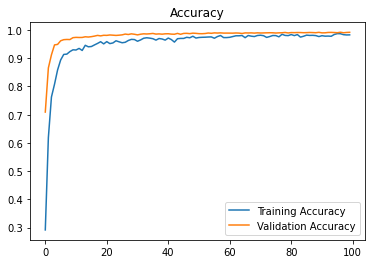

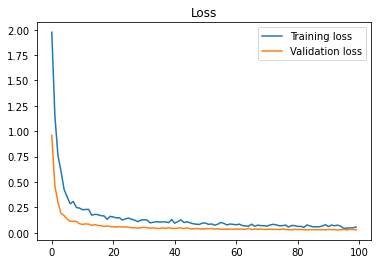

In [6]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_function = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.0001)
# Training Accuracy
train_history = model.fit (train_generator, 
                                    steps_per_epoch=10, 
                                    epochs=100, 
                                    verbose=1,
                                    validation_data=(x_val_normalized,y_val_onehot),
                                    callbacks=[learning_rate_function])

# Testing Accuracy
score = model.evaluate(x_test_normalized, y_test_onehot)
print()
print("Testing Accuracy {}%".format(score[1]))

# plot 
plot = plt.figure(1)
plt.title('Accuracy')
plt.plot(train_history.history['accuracy'],label='Training Accuracy')
plt.plot(train_history.history['val_accuracy'],label='Validation Accuracy')
plt.legend()

plot = plt.figure(2)
plt.title('Loss')
plt.plot(train_history.history['loss'],label='Training loss')
plt.plot(train_history.history['val_loss'],label='Validation loss')
plt.legend()


model.save("MNIST_Benvolence_Chinomona_Group_25.h5")